In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\A S U S\Desktop\DS\Portfolio Project\Project2\eda_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [4]:
# Let's take out the essential columns for the model building

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]


In [5]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,job_state,same_state,age,python_yn,spark,aws,excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,NM,0,47,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,MD,0,36,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,FL,1,10,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,WA,1,55,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,NY,1,22,1,0,0,1,data scientist,na,2728


In [6]:
# let us create the dummy variables

df_mod_dum = pd.get_dummies(df_model)
df_mod_dum.head()

,avg_salary,Rating,num_comp,same_state,age,python_yn,spark,aws,excel,desc_len,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,47,1,0,0,1,2536,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,36,1,0,0,0,4783,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,1,10,1,1,0,1,3461,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,1,55,1,0,0,0,3883,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,1,22,1,0,0,1,2728,...,0,0,1,0,0,0,0,0,1,0


# Let's check out some model efficiency to find out the best model for the datasets. 


In [100]:
# train test split

from sklearn.model_selection import train_test_split

X = df_mod_dum.drop(columns='avg_salary')
y= df_mod_dum['avg_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 113)

In [101]:
# Checking OLS method for Multiple Linear Regression

import statsmodels.api as sm
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
results = model.fit()
results.summary()


C:\Users\A S U S\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     9.836
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           5.11e-91
Time:                        12:03:19   Log-Likelihood:                -3326.0
No. Observations:                 742   AIC:                             6934.
Df Residuals:                     601   BIC:                             7584.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                48.8744      6.417      7.616      0.000      36.271      61.477
Rating                                                1.9922      1.919      1.038      0.300      -1.777       5.762
num_comp                                              2.3618      0.881      2.680      0.008       0.631       4.092
same_state                                            3.2156      2.650      1.213      0.226      -1.990       8.421
age                                                   0.0445      0.031      1.459      0.145      -0.015       0.104
python_yn                                             7.5626      2.563      2.951      0.003       2.530      12.595
spark                                                -0.1915      2.962     -0.065      0.948      -6.008       5.625
aws                                                   0.6936      2.760      0.251      0.802      -4.726       6.113
excel                                                 0.2890      2.298      0.126      0.900      -4.224       4.802
desc_len                                          -7.521e-05      0.001     -0.098      0.922      -0.002       0.001
Size_-1                                              20.8622      8.444      2.471      0.014       4.278      37.446
Size_1 to 50 employees                               -0.6138      6.530     -0.094      0.925     -13.438      12.211
Size_10000+ employees                                -5.5352      5.762     -0.961      0.337     -16.852       5.781
Size_1001 to 5000 employees                           1.7290      3.777      0.458      0.647      -5.688       9.146
Size_201 to 500 employees                             0.2104      3.850      0.055      0.956      -7.350       7.771
Size_5001 to 10000 employees                         -8.6996      5.390     -1.614      0.107     -19.286       1.886
Size_501 to 1000 employees                           -0.3849      4.012     -0.096      0.924      -8.264       7.494
Size_51 to 200 employees                              2.0604      4.476      0.460      0.645      -6.731      10.852
Size_Unknown                                         39.2458     12.553      3.126      0.002      14.593      63.899
Type of ownership_-1                                 20.8622      8.444      2.471      0.014       4.278      37.446
Type of ownership_College / University               12.3430     18.001      0.686      0.493     -23.010      47.696
Type of ownership_Company - Private                   9.6571      5.308      1.819      0.069      -0.767      20.081
Type of ownership_Company - Public                   14.3552      5.786      2.481      0.013       2.992      25.718
Type of ownersh

In [102]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error',cv=3))

-22.319433190900586

In [103]:
# Lasso Regression

lm_l = Lasso() 
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-22.62605484293013

In [104]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lm_l = Lasso(alpha= (i/100))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    

<IPython.core.display.Javascript object>

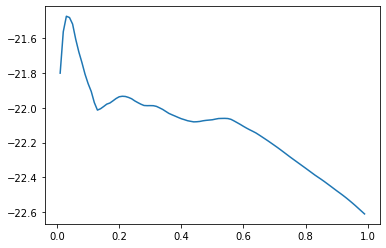

In [105]:
plt.plot(alpha,error)

In [106]:
zipped = tuple(zip(alpha,error))
zipped = pd.DataFrame(zipped,columns=['alpha','error'])
zipped[zipped.error == max(zipped.error)]

,alpha,error
2,0.03,-21.475171


In [107]:
# lasso regression with alpha = 0.04
lm_l = Lasso(alpha= .03) 
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21.475171120509952

In [108]:
# random forest 

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-17.13758188824663

In [109]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lm_l = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
print('for lm MAE is:',mean_absolute_error(y_test,tpred_lm))
print('for lm_l MAE is:',mean_absolute_error(y_test,tpred_lm_l))
print('for rf MAE is:',mean_absolute_error(y_test,tpred_rf))

for lm MAE is: 18.703934520492627
for lm_l MAE is: 18.450207064992036
for rf MAE is: 12.405964125560537


In [111]:
rf.score(X_test,y_test)

0.7435823786566442

In [112]:
lm_l.score(X_test,y_test)

0.6187798228527555

In [113]:
lm.score(X_test,y_test)

0.5950079446416825

In [120]:
import pickle
pickl = {'model': rf}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 169.0,
 1.0,
 1.0,
 1.0,
 0.0,
 4414.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,